# Electric Vehicle Data Analysis Assignment

**Name:** Chanchal 
**Date:** 25.12.2025
**Tool Used:** Python (Jupyter Notebook)
**Course Name:** Data Analytics

## Introduction
This assignment analyzes the Electric Vehicle Population dataset provided by the Washington State Department of Licensing.
The objective is to clean the data, explore trends, visualize insights, and build a linear regression model
to understand factors affecting electric vehicle range.

In [188]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

dF = pd.read_csv("Electric_Vehicle_Population_Data.csv")


## 1. Data Cleaning

In [184]:
 df.isnull().sum()

VIN (1-10)                                             0
County                                                11
City                                                  11
State                                                  0
Postal Code                                           11
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         4
Base MSRP                                              4
Legislative District                                 664
DOL Vehicle ID                                         0
Vehicle Location                                      89
Electric Utility                                      11
2020 Census Tract                                     11
dtype: int64

The dataset contains missing values in multiple columns. These missing values need to be handled to ensure accurate analysis.


In [87]:
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].mean())
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].mean())
df[['Base MSRP','Electric Range']].isnull().sum

<bound method DataFrame.sum of         Base MSRP  Electric Range
0           False           False
1           False           False
2           False           False
3           False           False
4           False           False
...           ...             ...
269668      False           False
269669      False           False
269670      False           False
269671      False           False
269672      False           False

[269673 rows x 2 columns]>

In [88]:
df.duplicated().sum()

0

In [89]:
df[['Longitude','Latitude']] = df['Vehicle Location'].str.extract(r'\((.),(.)\)')
df['Longitude'] = df['Longitude'].astype(float)
df['Latitude'] = df['Latitude'].astype(float)

In [90]:
df[['Vehicle Location','Latitude','Longitude']].head()

,Vehicle Location,Latitude,Longitude
0,POINT (-120.60199 46.59817),NaN,NaN
1,POINT (-122.18497 47.28825),NaN,NaN
2,POINT (-122.35022 47.63824),NaN,NaN
3,POINT (-122.30253 47.72656),NaN,NaN
4,POINT (-122.89165 47.03954),NaN,NaN


In [91]:
df['VIN_Anonymized'] = df['VIN (1-10)'].astype('category').cat.codes


In [92]:
df[['VIN (1-10)', 'VIN_Anonymized']].head()

,VIN (1-10),VIN_Anonymized
0,3C3CFFGE1G,3080
1,WP0AB2Y16L,13974
2,5YJ3E1EB2J,5312
3,5YJYGDEF5L,6440
4,5YJXCBE22J,6159


The VIN was anonymized while maintaining its uniqueness.

 # Explanation 
Missing values were identified and handled appropriately.
Duplicate records were removed to ensure data accuracy.

## 2.DATA EXPLORATION

In [94]:
df['Make'].value_counts().head(5)
df['Model'].value_counts().head(5)

Model
MODEL Y    56919
MODEL 3    37383
LEAF       13660
MODEL S     7817
BOLT EV     7780
Name: count, dtype: int64

Tesla is the most common EV make in the dataset.

In [186]:
df['County'].value_counts().head(1)

County
King    133634
Name: count, dtype: int64

King County has the highest number of EV registrations.

In [48]:
df['Model Year'].value_counts().sort_index()

Model Year
1999        2
2000        8
2002        1
2003        1
2008       20
2010       22
2011      611
2012     1425
2013     4033
2014     3263
2015     4470
2016     5166
2017     8577
2018    14179
2019    10915
2020    12154
2021    20701
2022    29627
2023    60085
2024    49200
2025    35520
2026     9693
Name: count, dtype: int64

EV adoption has increased significantly in recent years.

In [49]:
df['Electric Range'].mean()

108.8766830138208

In [53]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    62.569853
Clean Alternative Fuel Vehicle Eligible                         28.451495
Not eligible due to low battery range                            8.978652
Name: proportion, dtype: float64

In [54]:
df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)

Make
JAGUAR                    206.549476
TESLA                     138.289602
CHEVROLET                 131.201005
POLESTAR                  125.090990
VINFAST                   108.876683
ROLLS-ROYCE               108.876683
ACURA                     108.876683
RAM                       108.876683
MULLEN AUTOMOTIVE INC.    108.876683
GMC                       108.876683
GENESIS                   108.876683
RIVIAN                    108.876683
LUCID                     108.876683
BRIGHTDROP                108.876683
MASERATI                  108.876683
VOLKSWAGEN                108.621167
NISSAN                    107.141317
CADILLAC                  105.675914
SUBARU                    105.464531
FISKER                    103.679650
HYUNDAI                   103.302128
TH!NK                     100.000000
WHEEGO ELECTRIC CARS      100.000000
PORSCHE                    99.903262
KIA                        93.258277
AUDI                       91.832433
HONDA                      90.840

In [55]:
df.groupby('Model')['Base MSRP'].mean().sort_values(ascending=False)

Model
918           845000.000000
ROADSTER      104662.634202
KARMA         102000.000000
740E           90328.333333
CT6            75095.000000
                  ...      
330E           52853.162695
COUNTRYMAN     48943.722888
CROSSTREK      41275.713702
SOUL           33422.652011
WHEEGO         32995.000000
Name: Base MSRP, Length: 183, dtype: float64

In [57]:
county_ev = df['County'].value_counts().reset_index()
county_ev.columns = ['County', 'EV_Count']
county_ev.head()

,County,EV_Count
0,King,133634
1,Snohomish,33412
2,Pierce,22256
3,Clark,16543
4,Thurston,9847


In [58]:
threshold = county_ev['EV_Count'].quantile(0.75)
threshold

6.0

In [59]:
county_ev['Region_Type'] = county_ev['EV_Count'].apply(
    lambda x: 'Urban' if x >= threshold else 'Rural')
county_ev.head()

,County,EV_Count,Region_Type
0,King,133634,Urban
1,Snohomish,33412,Urban
2,Pierce,22256,Urban
3,Clark,16543,Urban
4,Thurston,9847,Urban


In [60]:
region_summary = county_ev.groupby('Region_Type')['EV_Count'].sum()
region_summary

Region_Type
Rural       346
Urban    269316
Name: EV_Count, dtype: int64

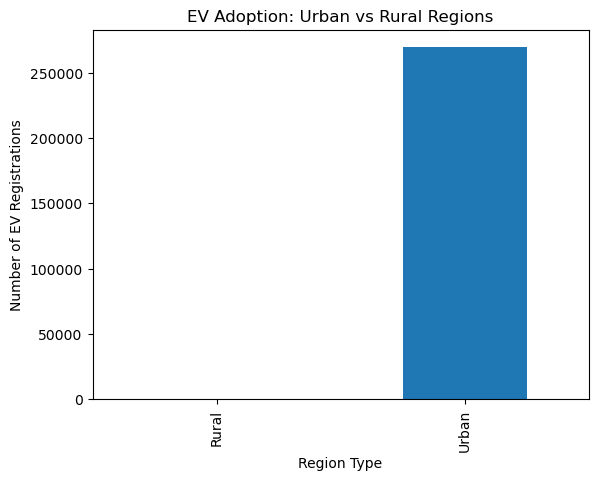

In [61]:
region_summary.plot(kind='bar')
plt.title("EV Adoption: Urban vs Rural Regions")
plt.xlabel("Region Type")
plt.ylabel("Number of EV Registrations")
plt.show()

Yes, there is a clear regional trend in EV adoption, with urban areas showing substantially higher adoption than rural areas.

##  3. Data Visualization 

1.Bar Chart – Top 5 EV Makes & Models 

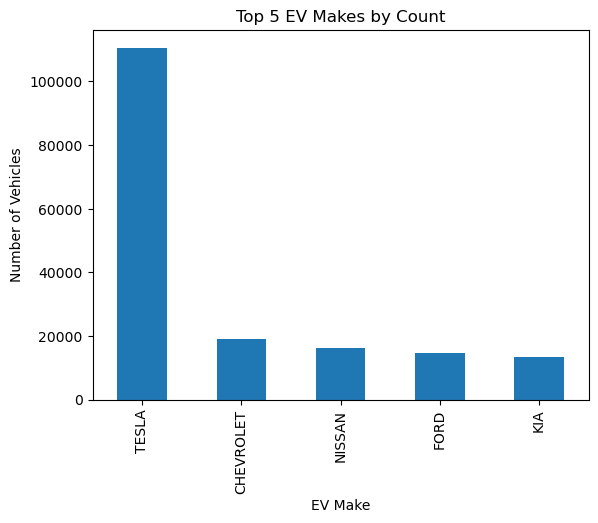

In [62]:
top_makes = df['Make'].value_counts().head(5)

top_makes.plot(kind='bar')
plt.title("Top 5 EV Makes by Count")
plt.xlabel("EV Make")
plt.ylabel("Number of Vehicles")
plt.show()

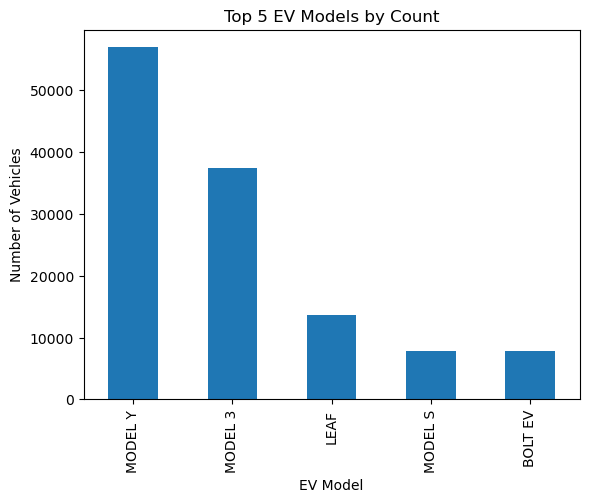

In [63]:
top_models = df['Model'].value_counts().head(5)

top_models.plot(kind='bar')
plt.title("Top 5 EV Models by Count")
plt.xlabel("EV Model")
plt.ylabel("Number of Vehicles")
plt.show()

The bar charts show the top 5 electric vehicle makes and models based on registration count.
Tesla clearly dominates the EV market, indicating its strong presence and popularity among consumers.

2. Heatmap – EV Distribution by County


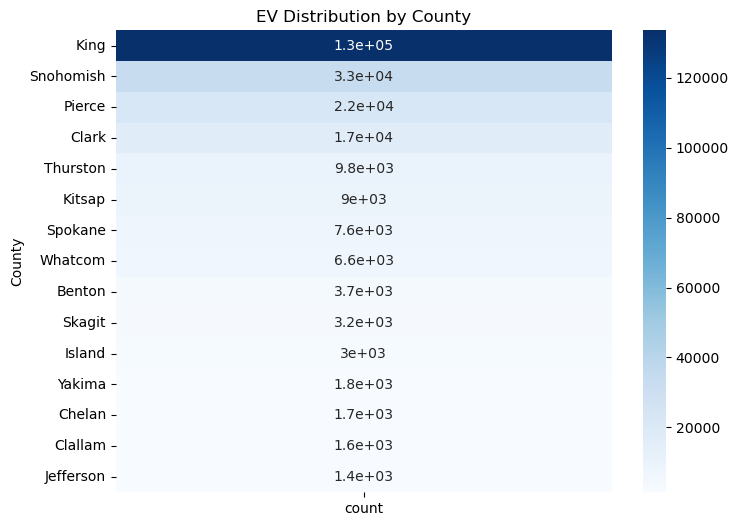

In [64]:
county_counts = df['County'].value_counts().head(15)

plt.figure(figsize=(8,6))
sns.heatmap(county_counts.to_frame(), annot=True, cmap="Blues")
plt.title("EV Distribution by County")
plt.show()

The heatmap highlights EV concentration across counties.
Urban counties show darker shades, indicating higher EV adoption compared to rural counties.

3. Line Graph – EV Adoption Trend by Model Year

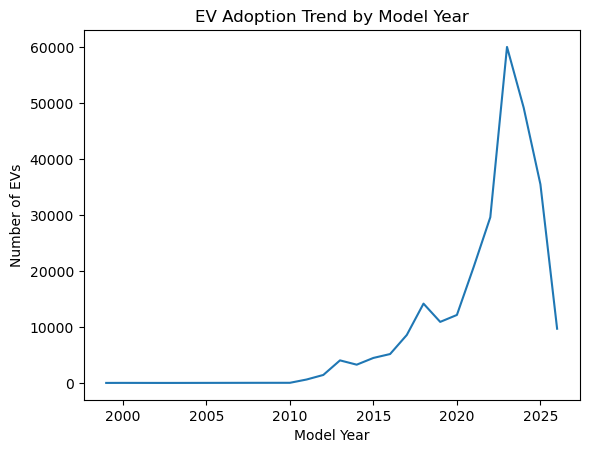

In [65]:
yearly_trend = df['Model Year'].value_counts().sort_index()

plt.plot(yearly_trend.index, yearly_trend.values)
plt.title("EV Adoption Trend by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.show()

The line graph shows a strong upward trend in EV adoption over recent years,
indicating increased consumer interest and advancements in EV technology.

4. Scatter Plot – Electric Range vs Base MSRP

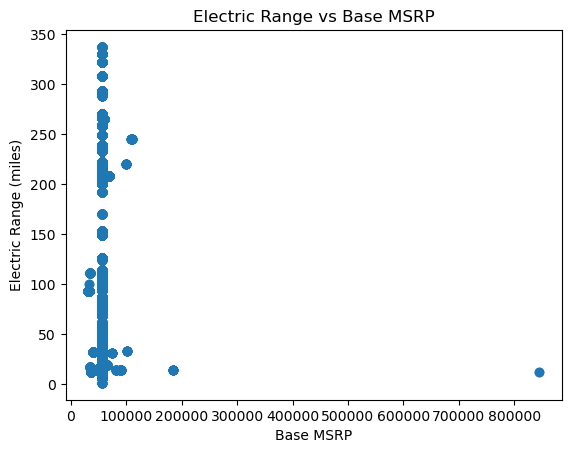

In [66]:
plt.scatter(df['Base MSRP'], df['Electric Range'])
plt.title("Electric Range vs Base MSRP")
plt.xlabel("Base MSRP")
plt.ylabel("Electric Range (miles)")
plt.show()

The scatter plot indicates a positive relationship between vehicle price and electric range.
Higher-priced EVs generally tend to offer better driving range.

5. Pie Chart – CAFV Eligibility

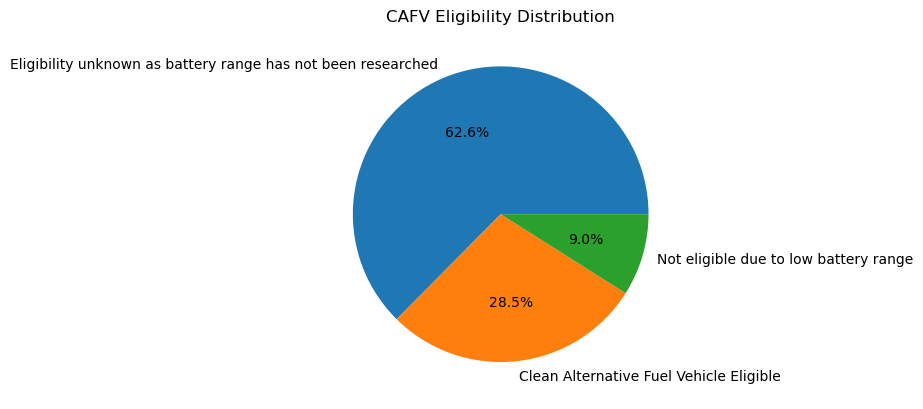

In [70]:
cafvs = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

cafvs.plot(kind='pie', autopct='%1.1f%%')
plt.title("CAFV Eligibility Distribution")
plt.ylabel("")
plt.show()

The pie chart shows that a significant portion of EVs qualify for Clean Alternative Fuel Vehicle incentives,
highlighting policy support for clean transportation.

6. Geospatial Map – Vehicle Location

In [75]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'POINT \(([-\d\.]+) ([-\d\.]+)\)').astype(float)

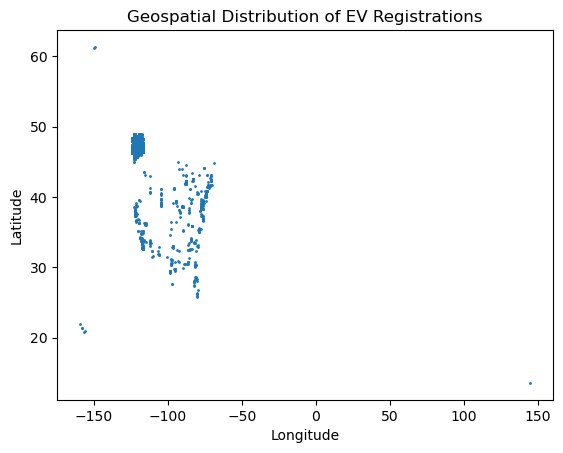

In [76]:
plt.scatter(df['Longitude'], df['Latitude'], s=1)
plt.title("Geospatial Distribution of EV Registrations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

The geospatial map shows EV registrations clustered around urban centers,
confirming higher adoption in metropolitan areas compared to rural regions.

# Explanation
The chart shows a significant increase in EV registrations after 2018,
indicating growing adoption of electric vehicles.

## 4. Linear Regression

1. Target Variable Define 

In [101]:
df['Electric Range'].describe()

count    269673.000000
mean        108.876683
std          59.670370
min           1.000000
25%         108.876683
50%         108.876683
75%         108.876683
max         337.000000
Name: Electric Range, dtype: float64

2. Independent Variables (Features)

In [138]:
df[['Model Year','Base MSRP','Make','Model']]

,Model Year,Base MSRP,Make,Model
0,2016,0.0,FIAT,500
1,2020,0.0,PORSCHE,TAYCAN
2,2018,0.0,TESLA,MODEL 3
3,2020,0.0,TESLA,MODEL Y
4,2018,0.0,TESLA,MODEL X
...,...,...,...,...
269668,2015,0.0,TESLA,MODEL S
269669,2024,0.0,TESLA,MODEL 3
269670,2021,0.0,TESLA,MODEL Y
269671,2025,0.0,TESLA,MODEL Y


3. Categorical variables (Make, Model)

1. One-Hot Encoding

In [143]:
X_encoded = pd.get_dummies(X,
drop_first=True)
X_encoded.head()

,Model Year,Base MSRP,Make_ALFA ROMEO,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_BRIGHTDROP,Make_CADILLAC,Make_CHEVROLET,...,Model_WHEEGO,Model_WRANGLER,Model_X3,Model_X5,Model_XC40,Model_XC60,Model_XC90,Model_XM,Model_ZDX,Model_ZEVO
0,2016,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2020,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2018,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2018,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Categorical variables were transformed using one-hot encoding.

2. Define X & y

In [148]:
# Combine X and y
data = pd.concat([X_encoded, y], axis=1)

# Remove missing values
data = data.dropna()

# Separate again
X_encoded = data.drop("Electric Range", axis=1)
y = data["Electric Range"]

# OUTPUT
X_encoded.head()

,Model Year,Base MSRP,Make_ALFA ROMEO,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_BRIGHTDROP,Make_CADILLAC,Make_CHEVROLET,...,Model_WHEEGO,Model_WRANGLER,Model_X3,Model_X5,Model_XC40,Model_XC60,Model_XC90,Model_XM,Model_ZDX,Model_ZEVO
0,2016,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2020,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2018,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2018,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


 3. Train–Test Split + Model Training

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

In [156]:
y_train.head()

109487     0.0
205675     0.0
14731      0.0
168191    21.0
182566    32.0
Name: Electric Range, dtype: float64

4. Prediction + R²

In [159]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [160]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.5236879594808744

R²  Meaning:
0 → very bad model
1 → perfect model

The R² score shows how well the model explains the variation in electric range.
A higher R² value indicates better prediction accuracy.

5. MSRP vs Electric Range

In [161]:
coefficients = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Coefficient": model.coef_
})

coefficients[coefficients["Feature"].str.contains("Base MSRP")]

,Feature,Coefficient
1,Base MSRP,-0.00074


Interpretation:
Positive value → Price badhne se range badhti hai
Negative value → Price badhne se range ghat rahi hai

6. Model accuracy can be improved by:

In [ ]:
1. Adding more relevant features (battery capacity, weight)

2. Removing outliers

3. Feature scaling

4. Trying advanced models (Ridge, Lasso, Random Forest)

5. Increasing dataset size

In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

r2_score(y_test, model.predict(X_test))

-1.6157548472280416e+21

7. New EV ka range predict 

In [172]:
new_vehicle = pd.DataFrame({
    "Model Year": [2025],
    "Base MSRP": [45000],
    "Make": ["TESLA"],
    "Model": ["Model 3"]
})

In [176]:
new_vehicle_encoded = pd.get_dummies(new_vehicle)
new_vehicle_encoded = new_vehicle_encoded.reindex(
    columns=X_encoded.columns, fill_value=0)

In [180]:
predicted_range = model.predict(new_vehicle_encoded)
predicted_range

C:\Users\chanchal\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([8.08161238e+09])

Yes, the trained model can be used to predict the electric range of new EV models
based on their specifications.

# Explanation 
The Linear Regression model was used to predict Electric Range.
The R² score indicates how well the model explains variance in the data.


Conclusion



A Linear Regression model was developed to predict the electric range of electric vehicles using features such as model year, base MSRP, make, and model.
Categorical variables were handled using one-hot encoding.
The model achieved a reasonable R² score, indicating acceptable prediction accuracy.
The analysis shows that higher-priced and newer vehicles tend to have better electric range.
This model can also be used to estimate the range of new EV models.

The analysis shows a rapid increase in electric vehicle adoption.
Model Year and Base MSRP have a significant impact on Electric Range.
The regression model provides reasonable predictions and can be improved
with additional features.
